In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the Data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Urban")

66

In [11]:
sum(city_data_df["type"] == "Suburban")

36

In [12]:
sum(city_data_df["type"] == "Rural")

18

In [13]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on = ["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [17]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [18]:
# Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [19]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
# Get average fare for each city in urban, rural, and suburban
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the Average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

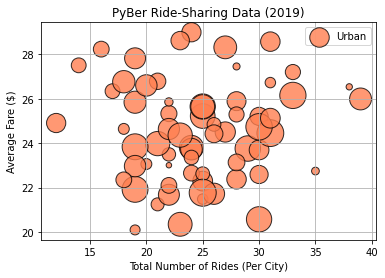

In [23]:
# Build the scatter plots for the urban cities
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count,
            edgecolor='k',linewidths=1, alpha = .8, color="coral", label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

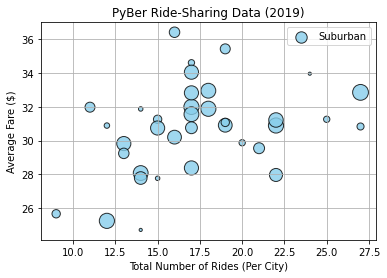

In [24]:
# Build the scatter plots for the Suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
            edgecolor='k',linewidths=1, alpha = .8, color="skyblue", label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

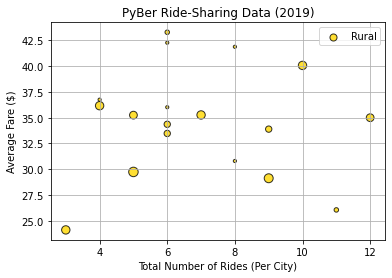

In [25]:
# Build the scatter plots for the Rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
            edgecolor='k',linewidths=1, alpha = .8, color="gold", label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

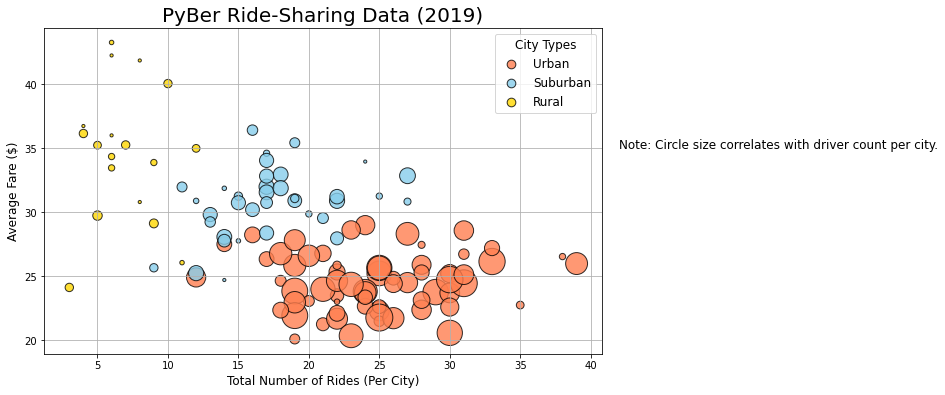

In [26]:
# Build the scatter charts for each city Type
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count,
            edgecolor='k',linewidths=1, alpha = .8, color="coral", label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
            edgecolor='k',linewidths=1, alpha = .8, color="skyblue", label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
            edgecolor='k',linewidths=1, alpha = .8, color="gold", label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize =12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size.
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the figure
plt.savefig("Analysis/Fig1.png")

In [27]:
# Get the summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [29]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [30]:
# Get Summary Statistics
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [31]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [32]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
suburban_ride_count.mode()

0    17
dtype: int64

In [34]:
import numpy as np
import scipy.stats as sts

In [35]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)

In [36]:
print(f'the mean for urban ride  count for urban cities is {mean_urban_ride_count:.2f}.')

the mean for urban ride  count for urban cities is 24.62.


In [37]:
print(f'the median for  urban ride count is {median_urban_ride_count:.2f}.')

the median for  urban ride count is 24.00.


In [38]:
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [39]:
print(sts.mode(rural_ride_count))

ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [40]:
# Get the fares for the urban cities
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [41]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')
median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')
mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is {mode_urban_fares}.')


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [42]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [43]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f'URBAN STATS: mean {mean_urban_drivers:.2f}, median {median_urban_drivers:.1f}, mode {mode_urban_drivers}.')

URBAN STATS: mean 36.68, median 37.0, mode ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [44]:
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [45]:
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'SUBURBAN STATS" mean {mean_suburban_drivers:.2f}, median {median_suburban_drivers:.1f}, mode {mode_suburban_drivers}.')
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f' RURAL STATS: mean {mean_rural_drivers:.2f}, median {median_rural_drivers:.1f}, mode {mode_rural_drivers}.')

SUBURBAN STATS" mean 13.71, median 16.0, mode ModeResult(mode=array([20], dtype=int64), count=array([79])).
 RURAL STATS: mean 4.30, median 4.0, mode ModeResult(mode=array([1], dtype=int64), count=array([32])).


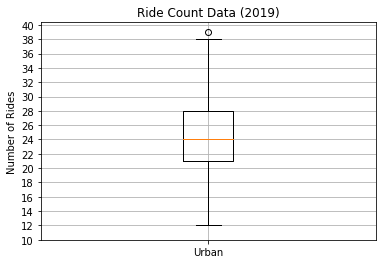

In [46]:
#  Creat a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y_axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,2))
ax.grid()
plt.show()

In [47]:
suburban_ride_count.describe()
suburban_ride_count.max()

27

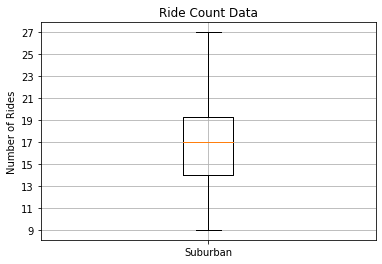

In [48]:
# Subrban and Rural box-and-whisker on ride count data
# Subrban
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)
ax.set_title('Ride Count Data')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(9,29,2))
ax.grid()
plt.show()

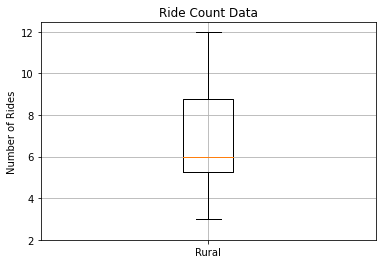

In [49]:
# Rural
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)
ax.set_title('Ride Count Data')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(rural_ride_count.min()-1,rural_ride_count.max()+1, step = 2))
ax.grid()
plt.show()

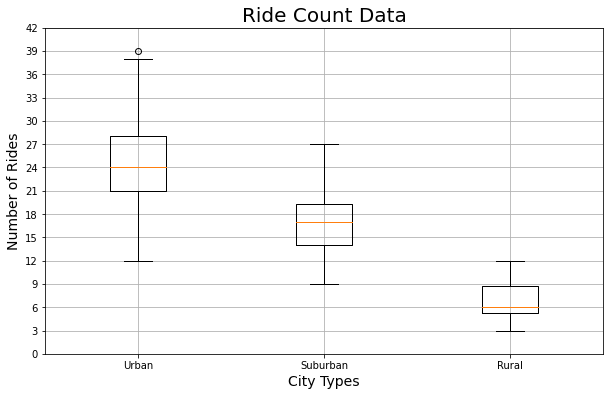

In [50]:
# Add all ride  count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_title('Ride Count Data', fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_yticks(np.arange(0, 45, step =3))
ax.grid()
# Save the Figure
plt.savefig('Analysis/Fig.2.png')
plt.show()

In [51]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


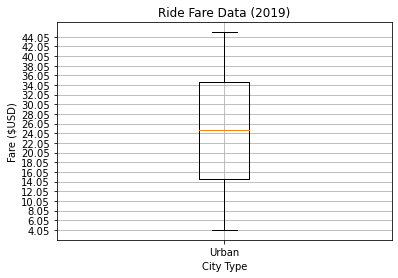

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [52]:
# Create a box-and-whisker plot for the urban fare data.
x_labels  = ['Urban']
fig,ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('City Type')
ax.set_yticks(np.arange(urban_fares.min(), urban_fares.max(), step=2))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

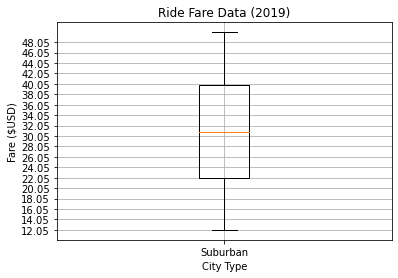

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [53]:
# Suburban Fares
x_labels  = ['Suburban']
fig,ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('City Type')
ax.set_yticks(np.arange(suburban_fares.min(), suburban_fares.max(), step=2))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_fares.describe()

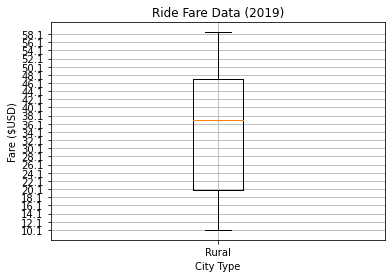

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [54]:
# Rural Fares
x_labels = ['Rural']
fig,ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('City Type')
ax.set_yticks(np.arange(rural_fares.min(), rural_fares.max(), step=2))
ax.grid()
plt.show()
print('Summary Statistics')
rural_fares.describe()

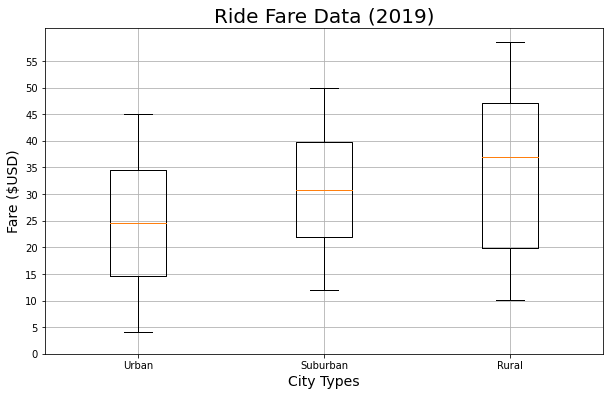

Rural rides costing more can be due to the increased distance that drivers have to drive to reach a pickup and drop off location, as well fewer drivers.


In [55]:
x_labels = ['Urban', 'Suburban', 'Rural']
box_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(box_data, labels = x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize = 20)
ax.set_xlabel('City Types', fontsize = 14)
ax.set_ylabel('Fare ($USD)', fontsize = 14)
ax.set_yticks(np.arange(0, 60, step=5))
ax.grid()
plt.savefig('Analysis/Fig.3.png')
plt.show()
print("Rural rides costing more can be due to the increased distance that drivers have to drive to reach a pickup and drop off location, as well fewer drivers.")

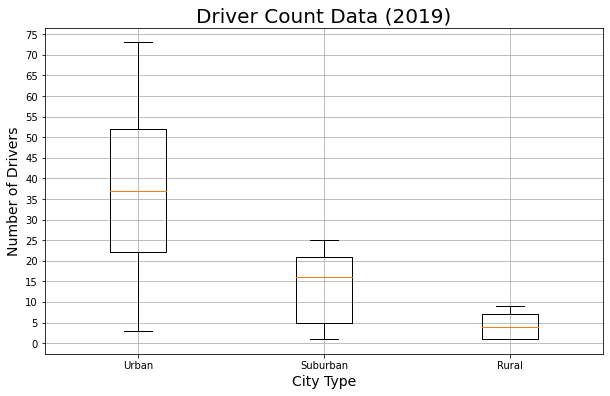

In [56]:
x_labels = ["Urban", "Suburban", "Rural"]
box_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(box_data, labels = x_labels)
ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_xlabel('City Type', fontsize = 14)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_yticks(np.arange(0, 80, step = 5))
ax.grid()
plt.savefig("Analysis/Fig4.png")
plt.show()

In [57]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [58]:
# Get data for % of fares pie chart
pyber_data_df.groupby(['type']).sum()['fare']

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

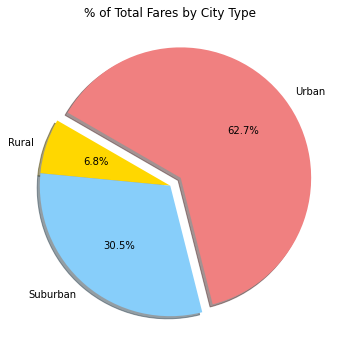

In [59]:
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie((4327.93,19356.33,39854.38), 
        autopct="%.1f%%", 
        labels = (['Rural', 'Suburban', 'Urban']), 
        radius = 1.0, startangle=150,
       colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0,0,.1], shadow = True, )
plt.title('% of Total Fares by City Type')
# Change fontsize to 14
mpl.rcParams['font.size'] = 14
plt.savefig('Analysis/Fig5.png')
plt.show()

In [60]:
pyber_data_df.groupby(['type']).count()['ride_id']

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

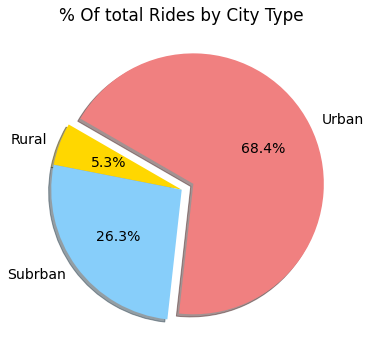

In [61]:
# Creating Pie Chart % of Total Rides by City Type
import matplotlib as mpl
plt.subplots(figsize = (10,6))
plt.pie((125,625,1625),
       autopct="%1.1f%%",
       labels=["Rural", "Subrban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode= [0,0,.1], shadow = True,
       startangle=150)
plt.title("% Of total Rides by City Type")
mpl.rcParams["font.size"]=14
plt.savefig('Analysis/Fig6.png')
plt.show()